# RECEPTOR

En este archivo lo primero es recibir el archivo correspondiente a la señal modulada 

In [1]:
#Importamos las librerias necesarias 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import wave

#Subimos de nivel la carpeta para importar las funciones de otros archivos 
import sys 
sys.path.append("..")

#Importamos las funciones de otros archivos 
from modules.caracteristicas import Audio_Caracteristicas,Audio_FFT,Audio_Grafica
from scipy.signal import resample_poly
from scipy.io import wavfile
from modules.codificar import Codificar_Senial
from scipy.signal import butter, filtfilt


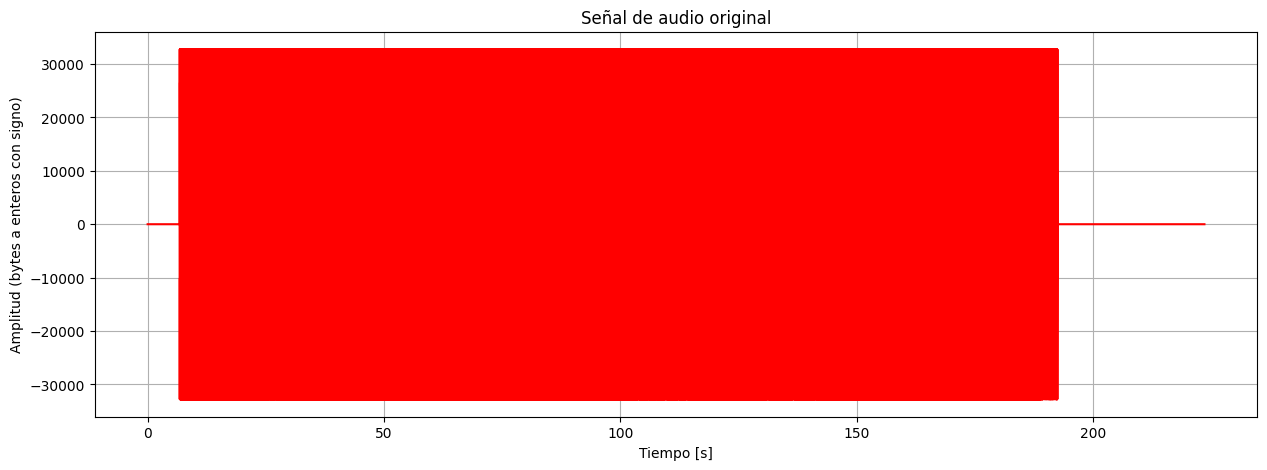

Canales: 1
Bits por muestra: 16
Frecuencia de muestreo: 50000 Hz
Duración: 223.49 segundos
La cantidad de meustras en la señal modulada debe ser igual que en el transmisor: 11174400


In [2]:
# Importamos el archivo con la señal modulada 
ruta = "Senial_OOK_1000.wav"
#ruta_2 = "Senial_OOK.wav"
Senial_OOK,t_Senial_OOK = Audio_Grafica(ruta)
canales,bits,fs,muestras,duracion=Audio_Caracteristicas(ruta)
print("La cantidad de meustras en la señal modulada debe ser igual que en el transmisor:",muestras)

# Demodulacion
En la practica demodulariamos con un dectector de envolvente, que consta de rectificar la señal y filtrarla 

Se tratara de realizar lo mismo por software 

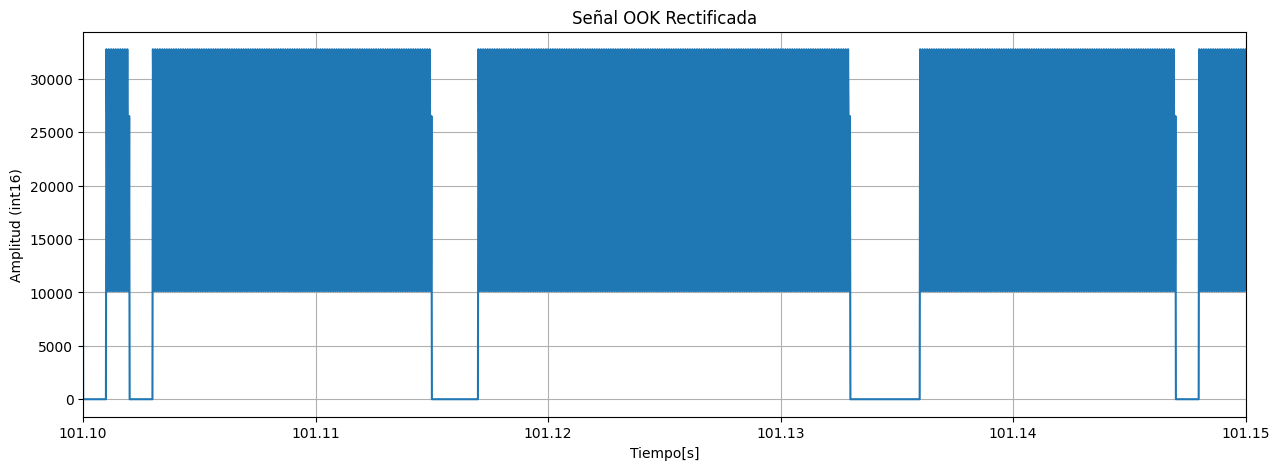

In [11]:
# rectificamos la señal
Senial_OOK_Rectificada = np.abs(Senial_OOK)
#Graficamos la señal rectificada 
plt.figure(figsize=(15,5))
plt.plot(t_Senial_OOK,Senial_OOK_Rectificada)
plt.title("Señal OOK Rectificada")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud (int16)")
plt.grid(True)
plt.xlim(101.1,101.15)
plt.show()

In [6]:
print("Cantidad de elementos en la señal rectificada:",len(Senial_OOK_Rectificada))

Cantidad de elementos en la señal rectificada: 11174400


C:\Users\MI PC\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


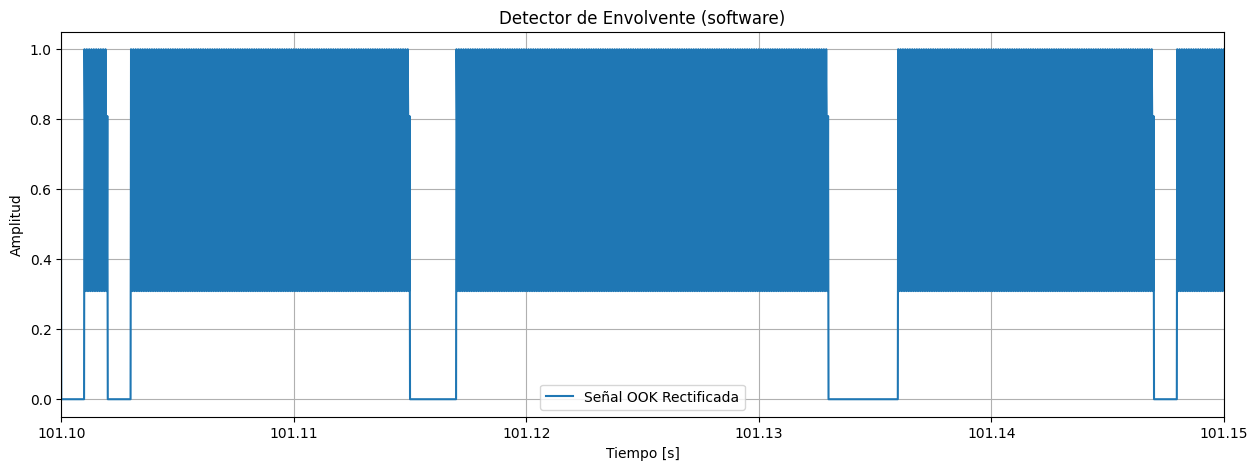

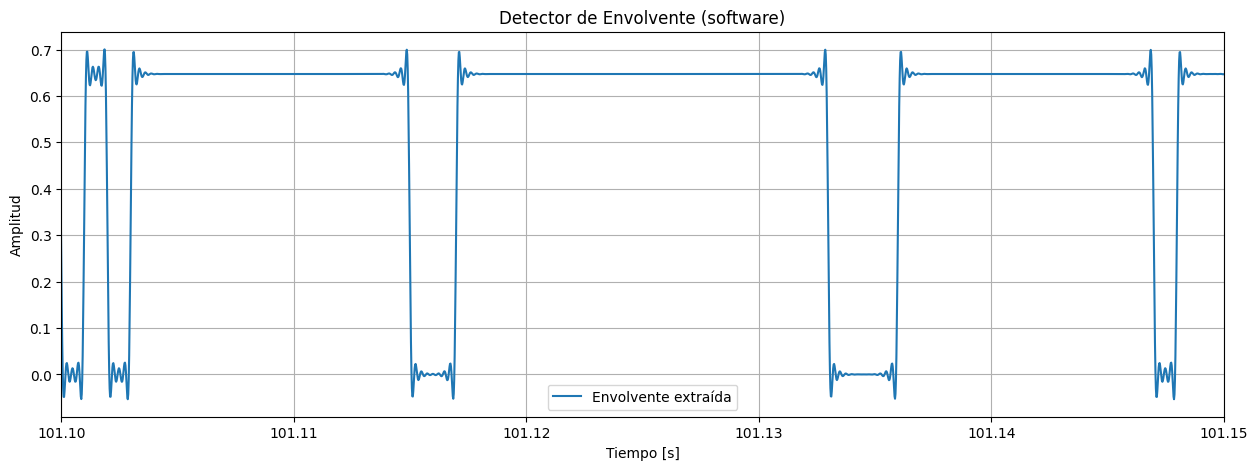

In [ ]:

# normalizamos 
# convertimos en numeros de punto flotante (signo,exponente,mantisa)
Senial_OOK_Rectificada = Senial_OOK_Rectificada.astype(np.float16)
# normalizamos la señal dividiendo en el numero maximo del arreglo 
Senial_OOK_Rectificada /= np.max(Senial_OOK_Rectificada)
#filtramos (FPB)
fs = 50000
fc_audio = 4000 # banda de guarda 
b,a = butter(N=8,Wn=fc_audio/(fs/2),btype='low')
envolvente = filtfilt(b,a,Senial_OOK_Rectificada)
#graficamos
t = np.arange(len(Senial_OOK)) / fs
#plt.figure(figsize=(15,5))
#plt.plot(t, Senial_OOK_Rectificada, label='Señal OOK Rectificada')
#plt.xlabel("Tiempo [s]")
#plt.ylabel("Amplitud")
#plt.title("Detector de Envolvente (software)")
#plt.xlim(101.1,101.15)
#plt.legend()
#plt.grid(True)
#plt.show()

plt.figure(figsize=(15,5))
plt.plot(t, envolvente, label='Envolvente extraída')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Detector de Envolvente (software)")
plt.xlim(101.1,101.15)
plt.legend()
plt.grid(True)
plt.show()


In [7]:
print("Cantidad de elementos en la envolvente:",len(envolvente))

Cantidad de elementos en la envolvente: 11174400


In [8]:
umbral = np.mean(envolvente)
print("El valor medio de la envolvente es: ",umbral)
#umbral_2 = np.mean(envolvente_2)
#print("El valor medio de la envolvente_2 es: ",umbral_2)

El valor medio de la envolvente es:  0.25893173654708246


C:\Users\MI PC\AppData\Local\Temp\ipykernel_876\2893046184.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\MI PC\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


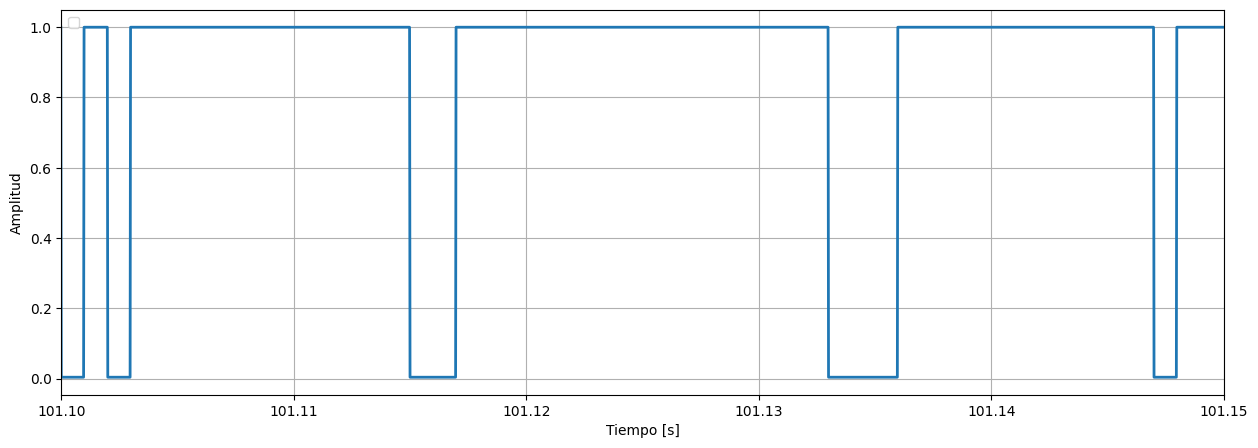

Duracion de Señal reconstruida  223.488


In [13]:
# comparador
senial_reconstruida = (envolvente > umbral).astype(np.uint8)  # valores: 0 y 1
senal_digital_audio = (senial_reconstruida * 2 - 1) * 255  # convierte 0 → -32767, 1 → +32767
senal_digital_audio = senal_digital_audio.astype(np.int16)
# graficamos
t_reconstruida = np.arange(len(senal_digital_audio)) / fs
plt.figure(figsize=(15,5))#plt.plot(t_reconstruida, senial_reconstruida, label='Señal Digital Reconstruida')
plt.plot(t_reconstruida, senal_digital_audio/255, linewidth=2)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
#plt.title("Detector de Envolvente (software)")
plt.xlim(101.1,101.15)
plt.legend()
plt.grid(True)
plt.show()
print("Duracion de Señal reconstruida ",len(senal_digital_audio)/50e3)


In [10]:
print("Cantidad de elementos en la señal reconstruida:",len(senial_reconstruida))

Cantidad de elementos en la señal reconstruida: 11174400


In [22]:
init_sample = 25
bits_per_sample = 50
cant_bits = len(senial_reconstruida)// bits_per_sample
print("Cantidad de bits del arreglo: ",cant_bits)
# generamos el arreglo final 
bits_reshaped = np.zeros(cant_bits,dtype=int)
for i in range(cant_bits):
    sample = i * bits_per_sample + init_sample
    bits_reshaped[i] = senial_reconstruida[sample]
print("El ancho del arreglo reconstruido es: ",len(bits_reshaped))

Cantidad de bits del arreglo:  223488
El ancho del arreglo reconstruido es:  223488


In [36]:

senial_reshape = bits_reshaped.reshape((13968,16))
print(len(senial_reshape))
#print(senial_reshape)

13968


In [35]:
# indicamos que el msb es el bit de signo
bin_weights = 1 << np.arange(15,-1,-1)
#Convertimos a enteros sin signo primero 
int_unsigned = senial_reshape.dot(bin_weights)
# Convertimos a enteros con signo 
senial_int_signed = int_unsigned.astype(np.int16) 
print("La cantidad de elementos del arreglo final es: ",len(senial_int_signed))
#print(senial_int_signed[:1000])

La cantidad de elementos del arreglo final es:  13968


In [32]:
# Reconstruimos el eje de tiempos para la fs de 3000 Hz 
fs_original=3000 #[Hz]
t_audio_demodulada = np.linspace(0,4.656,num=(len(senial_int_signed)))
print(len(t_audio_demodulada))

13968


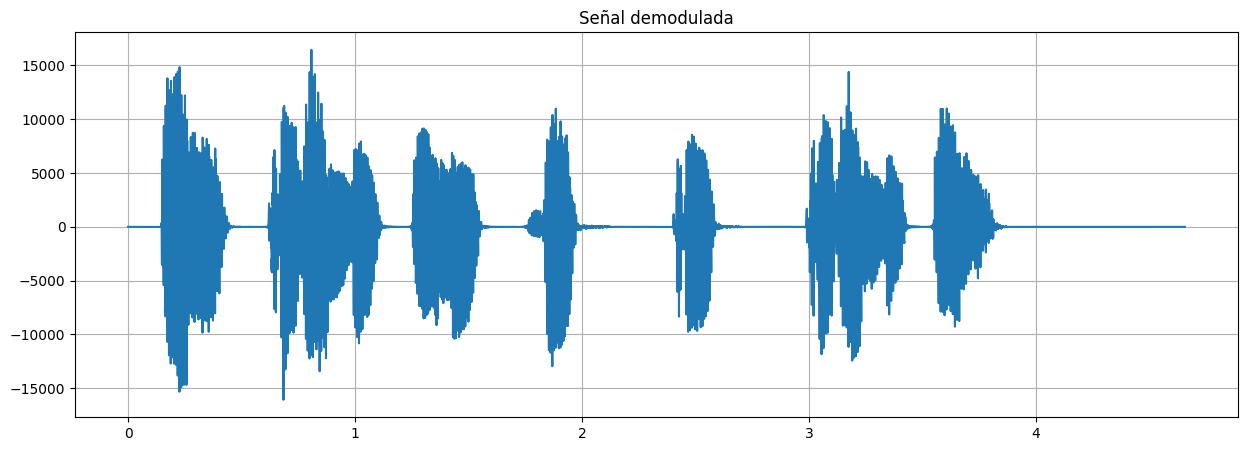

In [33]:
plt.figure(figsize=(15,5))
plt.plot(t_audio_demodulada,senial_int_signed)
plt.grid(True)
plt.title("Señal demodulada")
plt.show()

In [34]:
wavfile.write('Senial_Demodulada.wav',fs_original,senial_int_signed)